In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/Social_Network_Ads.csv').values
X = dataset[:,:-1]
y = dataset[:,-1]

In [3]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(X,y,test_size=0.25,random_state=1)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xTrain)
xTrainSC = sc.transform(xTrain)
# xTrainSC = sc.fit_transform(xTrain)
xTestSC = sc.transform(xTest)

In [5]:
from sklearn.svm import SVC
svcLinear=SVC(kernel='linear')
svcRBF=SVC(kernel='rbf')
svcPoly=SVC(kernel='poly',degree=3,coef0=1.0)

In [6]:
svcLinear.fit(xTrainSC,yTrain)
svcRBF.fit(xTrainSC,yTrain)
svcPoly.fit(xTrainSC,yTrain)

SVC(coef0=1.0, kernel='poly')

In [7]:
# 임의의 값을 입력으로 테스트
sample=[[33,50000]]
sampleSC=sc.transform(sample)
# scaling된 x로 learning하였으므로, predict 시, scaling한 x 사용
purchased1=svcLinear.predict(sampleSC)
purchased2=svcRBF.predict(sampleSC)
purchased3=svcPoly.predict(sampleSC)
print(purchased1,purchased2,purchased3)

[0] [0] [0]


In [8]:
# Test 데이터 적용
predLinear = svcLinear.predict(xTestSC)
predRBF = svcRBF.predict(xTestSC)
predPoly = svcPoly.predict(xTestSC)

In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score
cmLinear=confusion_matrix(yTest,predLinear)
cmRBF=confusion_matrix(yTest,predRBF)
cmPoly=confusion_matrix(yTest,predPoly)

accLinear=accuracy_score(yTest,predLinear)
accRBF=accuracy_score(yTest,predRBF)
accPoly=accuracy_score(yTest,predPoly)

print('* Linear SVC')
print('confusion matrix:\n ',cmLinear)
print('accuracy: ',accLinear)
print('\n* RBF SVC')
print('confusion matrix:\n ',cmRBF)
print('accuracy: ',accRBF)
print('\n* Polynomial SVC')
print('confusion matrix:\n ',cmPoly)
print('accuracy: ',accPoly)

* Linear SVC
confusion matrix:
  [[52  6]
 [12 30]]
accuracy:  0.82

* RBF SVC
confusion matrix:
  [[49  9]
 [ 3 39]]
accuracy:  0.88

* Polynomial SVC
confusion matrix:
  [[49  9]
 [ 3 39]]
accuracy:  0.88


In [10]:
x = np.arange(1,11,1)
y = np.arange(-10,-5,1)
X,Y = np.meshgrid(x,y)

In [11]:
print(X)
print(Y)

[[ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]]
[[-10 -10 -10 -10 -10 -10 -10 -10 -10 -10]
 [ -9  -9  -9  -9  -9  -9  -9  -9  -9  -9]
 [ -8  -8  -8  -8  -8  -8  -8  -8  -8  -8]
 [ -7  -7  -7  -7  -7  -7  -7  -7  -7  -7]
 [ -6  -6  -6  -6  -6  -6  -6  -6  -6  -6]]


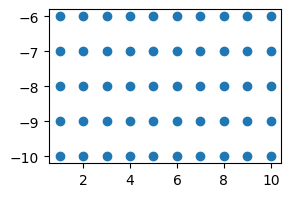

In [12]:
plt.figure(figsize=(3,2))
plt.scatter(X,Y)

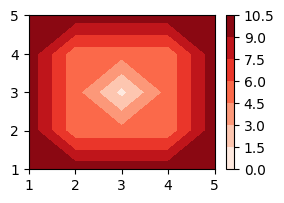

In [13]:
plt.figure(figsize=(3,2))
# np.arange(시작,끝,간격)
# np.linspace(시작,끝,개수)
x = np.linspace(1,5,5)
y = np.linspace(1,5,5)
X,Y = np.meshgrid(x,y)
Z = [[10,10,10,10,10],
    [10,5,5,5,10],
    [10,5,1,5,10],
    [10,5,5,5,10],
    [10,10,10,10,10]]

plt.contourf(X,Y,Z,cmap='Reds')
# X, Y, Z 모두 shape=(5,5)
plt.colorbar()

In [14]:
# SVC 시각화

# 1. age와 salary범위 지정
x1 = np.linspace(min(xTrain[:,0])-2,max(xTrain[:,0])+2,500)
x2 = np.linspace(min(xTrain[:,1])-2000,max(xTrain[:,1])+2000,500)

# 2. 좌표 생성 (meshgrid)
X1,X2 = np.meshgrid(x1,x2)
print(X1.shape, X2.shape)

(500, 500) (500, 500)


In [15]:
# 3. 각 좌표에 대해 SVC model prediction 구하기
#  * predict의 입력 shape 2D (n,2): (x1,x2)
#  * scaling한 후 입력

# 3-1. X1과 X2를 2D (n,1) array로 변형
X1_1d = X1.reshape(-1,1)
X2_1d = X2.reshape(-1,1)

# 3-2. 2D (n,2): (x1,x2)가 될 수 있도록, X1_1d와 X2_1d 결합
X1X2 = np.concatenate((X1_1d,X2_1d),axis=1)
# axis = 1: 2D일 경우, 좌우 결합

# 3-3. scaling
X1X2SC = sc.transform(X1X2)

# 3-4. prediction 값
yGridLinear = svcLinear.predict(X1X2SC)
yGridRBF = svcRBF.predict(X1X2SC)
yGridPoly = svcPoly.predict(X1X2SC)

# 3-5. yGrid를 X1, X2와 동일한 shape으로 변경
yGridLinear = yGridLinear.reshape(X1.shape)
yGridRBF = yGridRBF.reshape(X1.shape)
yGridPoly = yGridPoly.reshape(X1.shape)

TypeError: title() missing 1 required positional argument: 'label'

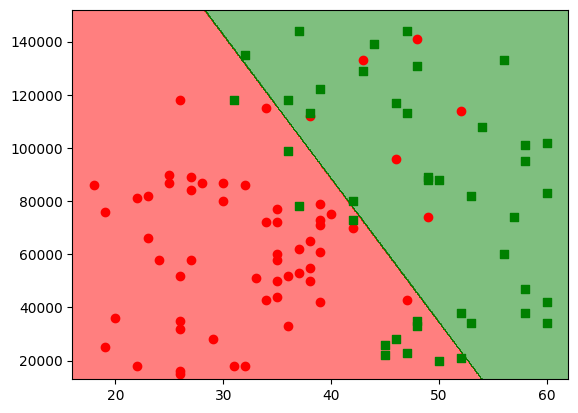

In [16]:
# 두 class를 상징하는 색상 cmap 생성
from matplotlib.colors import ListedColormap
svcColor = ListedColormap(('red','green'))
# red, green으로 구성된 cmap생성
plt.contourf(X1,X2,yGridLinear,cmap=svcColor,alpha=0.5)

# xTest중 yTest가 0이면, 붉은색 원
# xTest중 yTest가 1이면, 초록색 사각형
xTest0 = xTest[yTest==0,:] # yTest가 0인 xTest
xTest1 = xTest[yTest==1,:] # yTest가 1인 xTest

plt.scatter(xTest0[:,0],xTest0[:,1],color='red',marker='o',label='not purchased')
plt.scatter(xTest1[:,0],xTest1[:,1],color='green',marker='s',label='purchased')

plt.title()